# World Happiness Report: 2015-2017

*The [World Happiness Report](https://worldhappiness.report/) is a survey about global happiness, which involves ranking 150+ countries based on peoples' perception of their own happiness. The first report was released in 2012, and annual update has been released every year since.*

*This is the first in a series of notebooks that aim to explore the World Happiness Reports, and consequently try to understand the nature of happiness. As the first notebook, the goal here is to determine potential pathways for further exploration, i.e., to establish and clearly define issues about or aspects of happiness that can be the focus of the subsequent notebooks.*

## Datasets

The datasets below are streamlined versions of the tabular reports. These files have been lifted directly from Dataquest, which have already removed some columns. The datasets included here cover the reports for 2015, 2016, and 2017.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

wh15 = pd.read_csv('datasets/world_happiness_2015.csv')
wh16 = pd.read_csv('datasets/world_happiness_2016.csv')
wh17 = pd.read_csv('datasets/world_happiness_2017.csv')

Accurate and detailed descriptions of these variables can be found [here](https://s3.amazonaws.com/happiness-report/2015/StatisticalAppendixWHR3-April-16-2015.pdf), but simplified definitions are as follows:

| Column              | Definition          |
|:--------------------|:--------------------|
| Country | Name of the country |
| Region | Name of the region the country belongs to |
| Happiness Rank | A country's rank based on its happiness score |
| Happiness Score | A national average response from 0 - 10, which represents a measure of one's quality of life  |
| Economy (GDP per Capita) | GDP per capita in purchasing power parity (PPP) |
| Family | A measure of social support or being able to rely on someone in times of trouble, expressed as a 0 ("No") or 1 ("Yes") response to the question *If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?* |
| Health (Life Expectancy) | Also called Healthy Life Expectancy (HLE), is the ratio of one's healthy years (or years lived without any cripping illness) versus the total number of years in one's life |
| Freedom | A measure of self-perceived agency over one's own life, express as satifaction or dissastisfaction. It is a quantified answer to the question *Are you satisfied or dissatisfied with your freedom to choose what you do with your life?* |
| Trust (Government Corruption) | A measure of the average of the 0-or-1 responses to the two questions *Is corruption widespread throughout the government or not* and *Is corruption widespread within businesses or not?* | 
| Generosity | (lifted from the source) Generosity is the residual of regressing national average of response to the question *Have you donated money to a charity in the past month?* on GDP per capita  |
| Dystopia Residual | Represents the extent to which the six factors above over or under explain the happiness score. |

Below are the dataset overviews, arranged by year.

In [2]:
wh15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [3]:
wh16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
Country                          157 non-null object
Region                           157 non-null object
Happiness Rank                   157 non-null int64
Happiness Score                  157 non-null float64
Lower Confidence Interval        157 non-null float64
Upper Confidence Interval        157 non-null float64
Economy (GDP per Capita)         157 non-null float64
Family                           157 non-null float64
Health (Life Expectancy)         157 non-null float64
Freedom                          157 non-null float64
Trust (Government Corruption)    157 non-null float64
Generosity                       157 non-null float64
Dystopia Residual                157 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 16.1+ KB


In [4]:
wh17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness.Rank                   155 non-null int64
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.7+ KB


These datasets need to be cleaned and streamlined for further analysis down the road. To resolve some of the minor inconsistencies between the datasets, the following steps need to be completed:

| Step         | Columns             | Description
|:-------------|:--------------------|:------------------------------------------------------------|
| Drop  | wh15: **Standard Error**<br>wh16: **Lower Confidence Interval**,<br> **Upper Confidence Interval**<br>wh17: **Whisker.high**, **Whisker.low**  | Issues or questions I would like to raise are more conceptual or philosophical (as oppose to technical or statistical) in nature, so<br> statistical variables are not necessary in the meantime |
| Rename | wh17: all columns | Column name formats are different in the 2017 dataset; standardization needs to happen for further analysis |
| Add | wh17: **Region** | Values can be generated from previous-year data

In [5]:
# drop columns that are more statistical in nature
wh15.drop(columns='Standard Error', inplace=True)
wh16.drop(columns=['Lower Confidence Interval', 'Upper Confidence Interval'], inplace=True)
wh17.drop(columns=['Whisker.high', 'Whisker.low'], inplace=True)

# rename all wh17 columns
remove_periods = lambda x: x.replace('.', ' ')
wh17.rename(mapper=remove_periods, axis=1, inplace=True)

# add a 'Region' column in the 2017 dataset
regions = wh16.iloc[:,:2]
regions = regions.append(wh15.iloc[:,:2], ignore_index=True)
regions.drop_duplicates(inplace=True)
wh17 = wh17.merge(regions, how='left', on='Country', copy=False)

wh17[wh17['Region'].isnull()]['Country']

32    Taiwan Province of China
70     Hong Kong S.A.R., China
Name: Country, dtype: object

Taiwan and Hong Kong are in the previous year reports, under slightly different names. Both countries are classified under `Eastern Asia`, so the values need to be manually filled. 

In [6]:
# replace NaN values with 'Eastern Asia'
wh17['Region'].replace(to_replace=np.NaN, value='Eastern Asia', inplace=True)

# verify all NaN values have been filled
wh17['Region'].value_counts(dropna=False).sum() == wh17.shape[0]

True

In [7]:
# standardize column names for better access
wh_list = [wh15, wh16, wh17]
year = 2015

for df in wh_list:
    df.columns = df.columns.map(lambda x: x.replace('Happiness ', ''))
    df.columns = df.columns.map(lambda x: x.split(' ')[0].lower())
    df['year'] = year
    print('{}: {}'.format(year, df.columns))
    year += 1

2015: Index(['country', 'region', 'rank', 'score', 'economy', 'family', 'health',
       'freedom', 'trust', 'generosity', 'dystopia', 'year'],
      dtype='object')
2016: Index(['country', 'region', 'rank', 'score', 'economy', 'family', 'health',
       'freedom', 'trust', 'generosity', 'dystopia', 'year'],
      dtype='object')
2017: Index(['country', 'rank', 'score', 'economy', 'family', 'health', 'freedom',
       'generosity', 'trust', 'dystopia', 'region', 'year'],
      dtype='object')


After the data cleaning, here how the updated dataframes look like:

In [8]:
wh15.head(10)

,country,region,rank,score,economy,family,health,freedom,trust,generosity,dystopia,year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
5,Finland,Western Europe,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,2015
6,Netherlands,Western Europe,7,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570,2015
7,Sweden,Western Europe,8,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119,2015
8,New Zealand,Australia and New Zealand,9,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425,2015
9,Australia,Australia and New Zealand,10,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015


In [9]:
wh15.describe()

,rank,score,economy,family,health,freedom,trust,generosity,dystopia,year
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.0
mean,79.493671,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977,2015.0
std,45.754363,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550,0.0
min,1.000000,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2015.0
25%,40.250000,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410,2015.0
50%,79.500000,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415,2015.0
75%,118.750000,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415,2015.0
max,158.000000,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140,2015.0


In [10]:
wh16.head(10)

,country,region,rank,score,economy,family,health,freedom,trust,generosity,dystopia,year
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016
5,Canada,North America,6,7.404,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485,2016
6,Netherlands,Western Europe,7,7.339,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749,2016
7,New Zealand,Australia and New Zealand,8,7.334,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553,2016
8,Australia,Australia and New Zealand,9,7.313,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650,2016
9,Sweden,Western Europe,10,7.291,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734,2016


In [11]:
wh16.describe()

,rank,score,economy,family,health,freedom,trust,generosity,dystopia,year
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.0
mean,78.980892,5.382185,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807,2016.0
std,45.466030,1.141674,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220,0.0
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890,2016.0
25%,40.000000,4.404000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710,2016.0
50%,79.000000,5.314000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740,2016.0
75%,118.000000,6.269000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650,2016.0
max,157.000000,7.526000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720,2016.0


In [12]:
wh17.head(10)

,country,rank,score,economy,family,health,freedom,generosity,trust,dystopia,region,year
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Western Europe,2017
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Western Europe,2017
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Western Europe,2017
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Western Europe,2017
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Western Europe,2017
5,Netherlands,6,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,Western Europe,2017
6,Canada,7,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,North America,2017
7,New Zealand,8,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,Australia and New Zealand,2017
8,Sweden,9,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,Western Europe,2017
9,Australia,10,7.284,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,Australia and New Zealand,2017


In [13]:
wh17.describe()

,rank,score,economy,family,health,freedom,generosity,trust,dystopia,year
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.0
mean,78.000000,5.354019,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238,2017.0
std,44.888751,1.131230,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028,0.0
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914,2017.0
25%,39.500000,4.505500,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291,2017.0
50%,78.000000,5.279000,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910,2017.0
75%,116.500000,6.101500,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654,2017.0
max,155.000000,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485,2017.0


Based on the summaries above, some takeaways:
- The `Happiness Score` is the sum of values of seven different factors: economy, family, health, freedom, trust, generosity, and dystopia residual. Perhaps instead of just raw numbers, another study can include these factors as percentages so changes how much a factor impacts the overall happiness can be investigated. A special handling may be necessary for dystopia residual, since it somehow accounts for [inexplicable factors that contribute to happiness](https://medium.com/@bermanlucy19/what-makes-us-happy-73659cf89a0). 
- The same countries populate the top 10 year after year. The concentration of these top countries — 70% to be exact — are in Western Europe. This concentration is definitely informed by economic factors, but there may be other factors in play that are regional. Speaking of which, the entire region of Australia and New Zealand takes two of the top spots, while Canada rounds up the list. For 2017, these countries are in the 75th percentile of each of the factors that make up the happiness score.

## Initial Exploration

With the datasets cleaned and some initial takeaways on hand, it may be helpful to look at the data from a high-level perspective. For the initial exploration, the three datasets need to be combined. The combined dataframe then needs to be aggregated by year and then by region, to understand if time or location can tell anything. In addition, correlations are applied afterwards to surface potential connections between factors.

In [14]:
wh = pd.concat(wh_list, sort=False)

# aggregate data by year
year_cols = wh15.columns[3:11]
wh_years = wh.pivot_table(values=year_cols, index=['year'], aggfunc=np.mean)
wh_years[year_cols].T

year,2015,2016,2017
score,5.375734,5.382185,5.354019
economy,0.846137,0.953880,0.984718
family,0.991046,0.793621,1.188898
health,0.630259,0.557619,0.551341
freedom,0.428615,0.370994,0.408786
trust,0.143422,0.137624,0.123120
generosity,0.237296,0.242635,0.246883
dystopia,2.098977,2.325807,1.850238


In [15]:
# aggregate data by region
region_cols = wh15.columns[2:11]
wh_regions = wh.pivot_table(values=region_cols, index=['region'], aggfunc=np.mean)
wh_regions[region_cols].sort_values('rank').T

region,Australia and New Zealand,North America,Western Europe,Latin America and Caribbean,Eastern Asia,Middle East and Northern Africa,Central and Eastern Europe,Southeastern Asia,Southern Asia,Sub-Saharan Africa
rank,9.000000,10.000000,28.619048,48.661765,65.500000,77.379310,77.505747,78.500000,111.571429,128.461538
score,7.302500,7.227167,6.693000,6.069074,5.632333,5.387879,5.371184,5.364077,4.590857,4.150957
economy,1.379828,1.449062,1.391021,0.960079,1.249269,1.123945,1.027342,0.880421,0.639545,0.451379
family,1.327446,1.269152,1.244900,1.091907,1.106942,0.904168,1.065728,0.984215,0.685964,0.787394
health,0.863789,0.830477,0.853192,0.641650,0.830797,0.643763,0.662152,0.607841,0.483719,0.249353
freedom,0.609355,0.558530,0.514213,0.458245,0.421197,0.345383,0.335135,0.527108,0.374111,0.345589
trust,0.368657,0.228908,0.227669,0.103720,0.117597,0.164408,0.084788,0.142890,0.103500,0.114975
generosity,0.476069,0.424398,0.303440,0.212190,0.223557,0.192069,0.169759,0.437984,0.342052,0.225650
dystopia,2.277401,2.466653,2.158601,2.601250,1.683045,2.014162,2.026250,1.783628,1.961907,1.976592


In [19]:
# determine top regions per happiness factor
for col in region_cols[1:]:
    max_value = max(wh_regions[col])
    max_region = wh_regions[wh_regions[col] == max_value].index[0]
    print('{} — {}'.format(col, max_region, max_value))

score — Australia and New Zealand
economy — North America
family — Australia and New Zealand
health — Australia and New Zealand
freedom — Australia and New Zealand
trust — Australia and New Zealand
generosity — Australia and New Zealand
dystopia — Latin America and Caribbean


Takeaways:

- The data shows marginal differences in total happiness scores from 2015 to 2017, with the totals staying within the 5.34-5.39 range. Perhaps, looking at the factors that comprise these score may be more insightful.
- Two factors that have some movement within the last three years include `economy` and `family`. The former has shown a steady increase, while the latter shows a significant dip in 2016, only to surge past the 1.0 threshold the year after. It may be interesting to discover what world events, if any, triggered or informed these changes.
- As a top region, `Australia and New Zealand`, not surprisingly, dominates almost every category except for `economy` and `dystopia` (where it ranked third).
- The `Latin America and Caribbean` has an incredibly high dystopian residual coefficient. What factors are in play in this region that has not been effectively measured by the report? Does this indicate any bias against these countries?
- It is interesting to see that `generosity` is high in Southeastern Asia and Southern Asia, despite having low `economy` scores. In contrast, Switzerland, despite having one of the highest economy scores is constantly somewhere in the middle of the generosity spectrum.

With the aggregates completed, below are plotted correlations. The first part involves a graphed correlation for each year, and the succeeding part looks at the correlations across the three years.

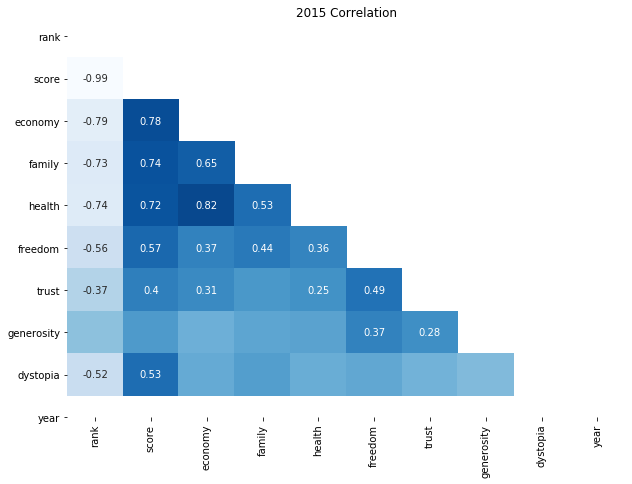

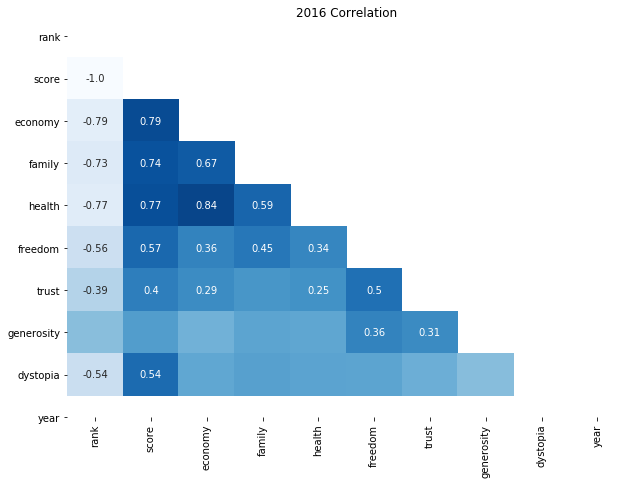

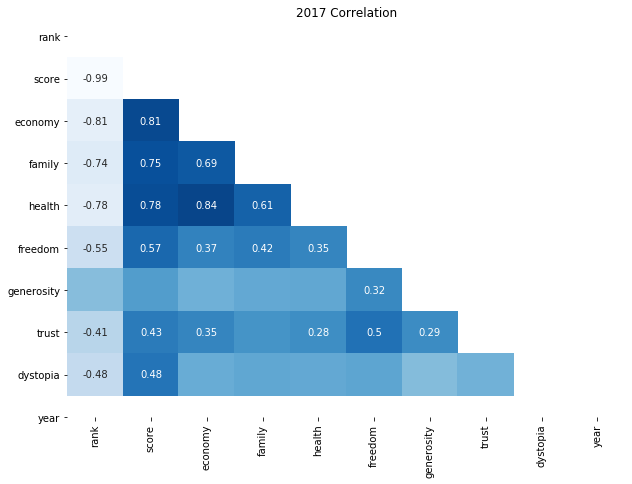

In [20]:
for w in wh_list:
    w_corr = w.corr()
    mask = np.triu(np.ones_like(w_corr))
    plt.figure(figsize=(10,7))
    ax = sns.heatmap(w_corr, mask=mask, cmap='Blues', annot=True, cbar=False)

    # format the plot text to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())
        if -0.25 < t < 0.25:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('medium')

    plt.title('{} Correlation'.format(w['year'].unique()[0]), pad=20)    
    plt.xticks(rotation=90, size='medium')
    plt.yticks(rotation=0, size='medium')
    plt.show()

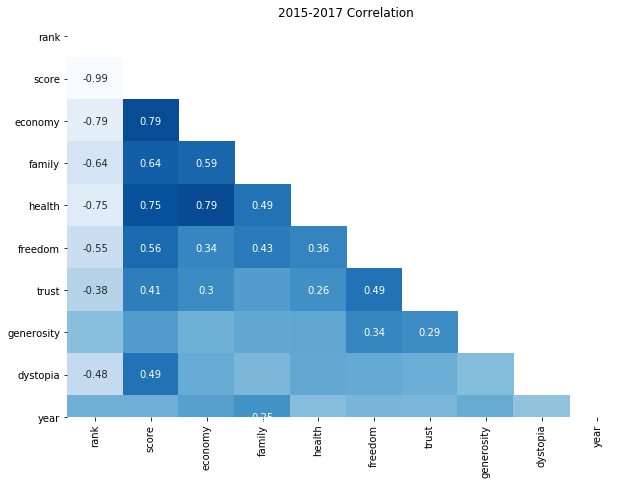

In [21]:
wh_corr = wh.corr()
mask = np.triu(np.ones_like(wh_corr))
plt.figure(figsize=(10,7))
ax = sns.heatmap(wh_corr, mask=mask, cmap='Blues', annot=True, cbar=False)

# format the plot text to make it easier to read
for text in ax.texts:
    t = float(text.get_text())
    if -0.25 < t < 0.25:
        text.set_text('')
    else:
        text.set_text(round(t, 2))
    text.set_fontsize('medium')

plt.title('2015-2017 Correlation', pad=20)    
plt.xticks(rotation=90, size='medium')
plt.yticks(rotation=0, size='medium')
plt.show()

Here are some quick takeaways from these graphs:
- The economy seems to be a factor that impacts the overall score in more ways than one. Economy shows very high correlations with family, health, freedom, and trust, which independently impact the overall score. Perhaps this suggests that the happiness score leans more heavily on GDP per capita than what's immediately measured.
- Out of all the factors, only `generosity` doesn't seem to be highly correlated with the overall score. This lack of correlation seem counter-intuitive, but the regions of Southeastern Asia and Southern Asia may have significantly weaken the correlation.
- There are some correlation pairs that may be interesting to explore further. For instance, the correlation between `health` and `family` may suggest that a strong social core or support system contributes to better health. The correlation between `trust` and `freedom` seem commonsensical — citizens who are given more agency by their government tend to trust more — but there may be something else there that may be worth exploring.


## Conclusion:

Based on these initial explorations, here are some pathways that may be interesting to tackle later on:

- **Factors as Percentages**. Right now, the seven factors that make up the Happiness Score are expressed as raw numbers instead of percentages of the total score. It would be interesting to see if the composition changes over a three-year stretch.
- **Principal Factors**. The factors `economy` and `family` seem to contribute significantly to overall happiness. 
- **Top Regions**. It is very interesting to look at Western European on a deeper level. Are there political and social strands within the region that enable countries to be at the top of the list? Is there a possibility of bias? In the same vein, is there anything to take away from the region of Australia and New Zealand?
- **Outliers**. What makes Southeastern Asia score high in `generosity`? What about Latin America and the Carribean in the dystopia residual?
- **Drastic Movements**. Given that the overall scores are pretty consistent, are there countries that have significantly increased or significantly decreased in their overall happiness during these three years? If so, what factors have contributed most to the movement?
- **Factors' Impact on Each Other**. As some of the high correlations between factor pairs suggest, these happiness factors may not necessarily be independent of each other. Take the case of `economy`, for instance. In that case, it may be worthwhile to investigate on how much and why these factors impact each other.

These further explorations will be covered in later notebooks.